<a href="https://colab.research.google.com/github/AmirKh20/Auto-MPG-Regression/blob/master/Auto_MPG_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto MPG
data concerns city-cycle fuel consumption

## About Dataset
This dataset is a slightly modified version of the dataset provided in the StatLib library.

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

### Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

### Citation
This dataset is downloaded from [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

# Reading and understanding our data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, names=columns,
                 na_values='?')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


Our target variable is mpg(miles per gallon).

We want to find out which predictors are the most valuable ones by interpreting feature importances and coefficients.

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean['brand'] = df_clean['car name'].str.split().map(lambda x: x[0])

In [ ]:
df_clean.drop('car name', axis=1, inplace=True)

We made a copy of our original dataset. Then we wanted to only have the brand names from `car name` column. So we splited the brand name and droped the `car name` column.

In [ ]:
df_clean['brand'].replace({
    'chevroelt': 'chevrolet',
    'chevy': 'chevrolet',
    'capri': 'ford',
    'toyouta': 'toyota',
    'mercedes': 'mercedes-benz',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'maxda': 'mazda',
}, inplace=True)

Then for furtur cleaning, We replaced some typos or wrong values with the right ones.

In [ ]:
df_clean['brand'].value_counts()

ford             52
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
renault           5
subaru            4
opel              4
saab              4
mercedes-benz     3
bmw               2
cadillac          2
triumph           1
hi                1
nissan            1
Name: brand, dtype: int64

As we can see from `value_counts()` method we have some values which only apear once. We want to get rid of them:

In [ ]:
df_clean.drop(df[df_clean['brand'].str.contains('^hi|^nissan|^triumph')].index, inplace=True)

Now we can look at the some statistics of our dataset:

In [ ]:
df_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,395.0,NaN,NaN,NaN,23.490633,7.764601,10.0,17.5,23.0,29.0,46.6
cylinders,395.0,NaN,NaN,NaN,5.455696,1.699488,3.0,4.0,4.0,8.0,8.0
displacement,395.0,NaN,NaN,NaN,193.512658,104.390185,68.0,102.5,151.0,262.0,455.0
horsepower,389.0,NaN,NaN,NaN,104.326478,38.358911,46.0,75.0,94.0,125.0,230.0
weight,395.0,NaN,NaN,NaN,2969.207595,844.094374,1613.0,2224.5,2807.0,3607.0,5140.0
acceleration,395.0,NaN,NaN,NaN,15.564557,2.763598,8.0,13.8,15.5,17.15,24.8
model year,395.0,NaN,NaN,NaN,76.0,3.681481,70.0,73.0,76.0,79.0,82.0
origin,395.0,NaN,NaN,NaN,1.56962,0.801071,1.0,1.0,1.0,2.0,3.0
brand,395,26,ford,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we see, 'ford' brand is the top frequent brand. And our features are not in the same scale. And also we have some null values for `horsepower` column.

We can also check the distribution of our brands using bar charts:

<Axes: >

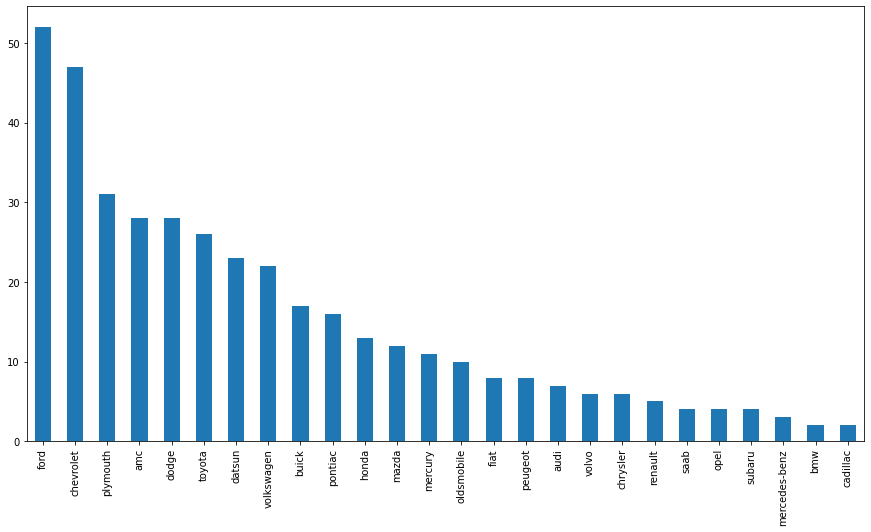

In [ ]:
plt.figure(figsize=(15, 8))
df_clean['brand'].value_counts().plot.bar()

In [ ]:
df_clean.brand.nunique()

26

# Spliting

In [ ]:
X = df_clean.drop('mpg', axis=1)
y = df_clean['mpg']

In [ ]:
rs = 42

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

In [ ]:
X_train.shape, X_test.shape

((316, 8), (79, 8))

# Preprocessing

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

We'll be using `OneHotEncoder` to encode our categorical features. And `StandardScaler` to scale our numerical features:

In [ ]:
categorical_features = [X.columns[-1]]
numerical_features = X.columns[:-1].values

preprocessor = make_column_transformer(
    (OneHotEncoder(sparse_output=False), categorical_features),
    (StandardScaler(), numerical_features),
    verbose_feature_names_out=False
)

## Null Values
Now let's look at the null values in our dataset

In [ ]:
n_nulls = df_clean.isnull().sum()
n_nulls[n_nulls != 0]

horsepower    6
dtype: int64

In [ ]:
X_train[X_train['horsepower'].isna()]

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
126,6,200.0,NaN,2875.0,17.0,74,1,ford
354,4,100.0,NaN,2320.0,15.8,81,2,renault
374,4,151.0,NaN,3035.0,20.5,82,1,amc


We have 6 null values for `horsepower` feature and 3 of them are included in the training data

## Duplcates
We can also look for the duplicates:

In [ ]:
df_clean.duplicated().sum()

0

No Duplicates! Good!

## Correlations

Correlations between our predictors and target variable:

In [ ]:
X.corrwith(y).abs().sort_values()

acceleration    0.432623
origin          0.559522
model year      0.571654
cylinders       0.773358
horsepower      0.777974
displacement    0.804281
weight          0.830458
dtype: float64

As we see they're pretty high! That's good!

We plot the correlations with `heatmap()` method from seaborn

In [ ]:
import seaborn as sns

<Axes: >

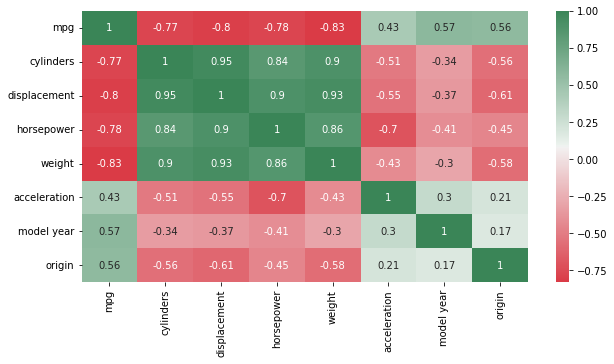

In [ ]:
cmap = sns.diverging_palette(10, 500, as_cmap=True)
plt.figure(figsize=(10, 5))
sns.heatmap(df_clean.corr(), annot=True, cmap=cmap)

There is high molticollinerity within our predictors!

That can be fixed with either l1 or l2 reqularization.

## Pair Plot

we set `kind` parameter to 'reg' so we see a regression line between our features, And we set `diag_kind` to 'kde' so we see the distribution of every feature using kde:

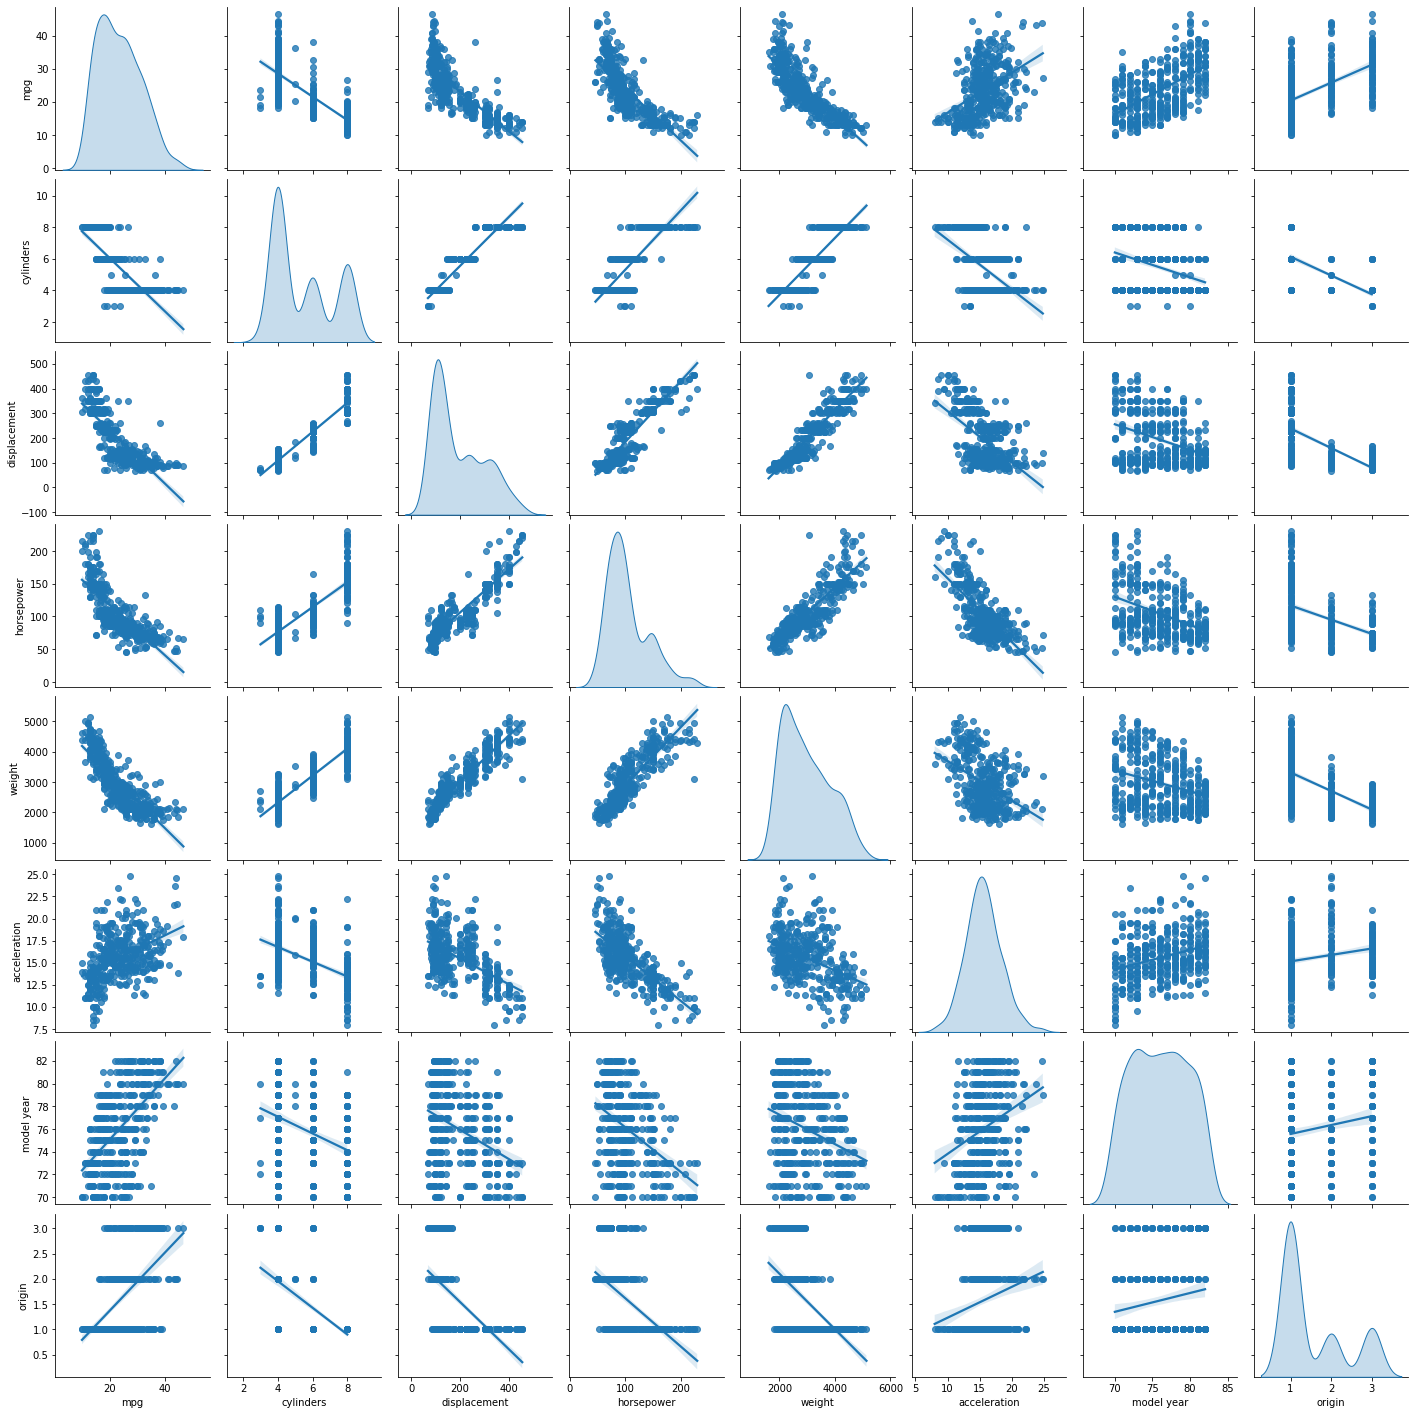

In [ ]:
sns.pairplot(df_clean, kind='reg', diag_kind='kde')

There are many informations we can get from this pair plot:

1.   Most of our predictors are lineary depndent with the target variable. GOOD for linear models!
2.   Nice distribution for our target variable! Again GOOD!
3.   High dependency and correlation within our features. BAD!



## Box Plot and Outliers

To see the ourliers. we use `boxplot` method as follows:

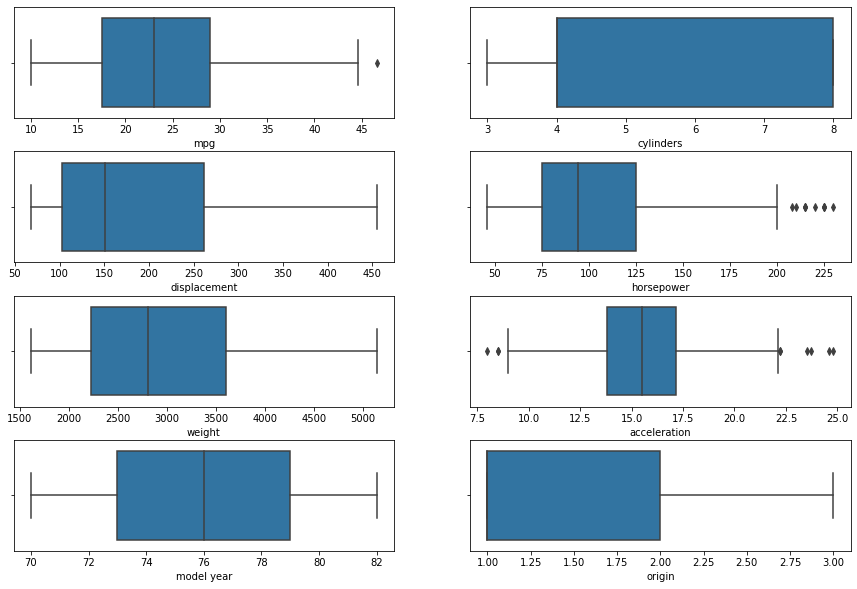

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.3)

for i, ax in enumerate(axs.flatten()):
    sns.boxplot(data=df_clean, x=df_clean.columns[i], ax=ax)

There are some outliers. but we can ignore them mostly!

# Linear Models

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

Create a pipeline object, and add preprocessor, imputer and our regressor - `LinearRegression()` -
We use KNNImputer to impute our null values after we one hot encoded and scaled our data.

In [ ]:
lin_reg_pipe = Pipeline([
    ('Preprocessor', preprocessor),
    ('Imputer', KNNImputer()),
    ('Regressor', LinearRegression())
])
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['brand']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  array(['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'], dtype=object))],
                                   verbose_feature_names_out=False)),
                ('Imputer', KNNImputer()), ('Regressor', LinearRegression())])

In [ ]:
lin_reg_pipe.score(X_test, y_test)

0.7700967932370884

In [ ]:
lin_reg_pipe.score(X_train, y_train)

0.8519156889540157

Meh scores 🤔

Maybe overfitting. We address this furture after polynomial regression.

### Features coefficent

In [ ]:
features = lin_reg_pipe[:-1].get_feature_names_out()
features

array(['brand_amc', 'brand_audi', 'brand_bmw', 'brand_buick',
       'brand_cadillac', 'brand_chevrolet', 'brand_chrysler',
       'brand_datsun', 'brand_dodge', 'brand_fiat', 'brand_ford',
       'brand_honda', 'brand_mazda', 'brand_mercedes-benz',
       'brand_mercury', 'brand_oldsmobile', 'brand_opel', 'brand_peugeot',
       'brand_plymouth', 'brand_pontiac', 'brand_renault', 'brand_saab',
       'brand_subaru', 'brand_toyota', 'brand_volkswagen', 'brand_volvo',
       'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'], dtype=object)

In [ ]:
lin_reg_coefs = pd.DataFrame(zip(features, lin_reg_pipe[-1].coef_), columns=['Feature', 'Coefficient']).set_index('Feature')
print(lin_reg_coefs)

                     Coefficient
Feature                         
brand_amc              -2.077768
brand_audi             -0.071857
brand_bmw              -1.232972
brand_buick            -0.518125
brand_cadillac          2.791789
brand_chevrolet        -0.328898
brand_chrysler         -0.611565
brand_datsun            1.287727
brand_dodge             0.099500
brand_fiat              1.505949
brand_ford             -1.256708
brand_honda             0.589747
brand_mazda            -0.357163
brand_mercedes-benz     1.526910
brand_mercury          -1.661195
brand_oldsmobile        0.255345
brand_opel             -0.384805
brand_peugeot           0.727558
brand_plymouth          0.966278
brand_pontiac           1.188197
brand_renault           2.016796
brand_saab             -0.842481
brand_subaru           -1.057059
brand_toyota           -0.775277
brand_volkswagen        1.362909
brand_volvo            -3.142832
cylinders              -0.790936
displacement            1.739428
horsepower

<Axes: ylabel='Feature'>

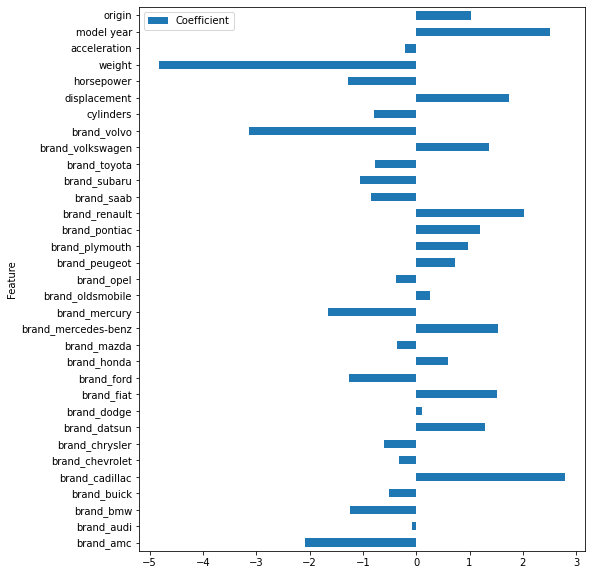

In [ ]:
lin_reg_coefs.plot.barh(figsize=(8, 10))

As we see the most important features are 'weight' and 'brand_volvo' also 'brand_cadilac' and 'model year'.

We can interpret this as weight of our car goes higher it goes less miles per gallon and as model year goes higher, so our car is newer, then mpg is higher. That means if our car is from a newer model it can go more miles per gallon.

Also if the car is from volvo then probably it would go less mile than a cadilac

### Error Display

We plot the actual vs predicted errors:

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
_, ax = plt.subplots(figsize=(15, 8))
PredictionErrorDisplay.from_estimator(lin_reg_pipe, X_test, y_test, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5})

And we can see visually that the model is not very good.

## Polynomial Regression

Let's see how adding polynomial features to the model will effect it's scores!

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

We will creat 3 preprocessors, so they will get applied sequentionly in our pipline:

In [ ]:
preprocessor_encode = make_column_transformer(
    (OneHotEncoder(sparse_output=False), categorical_features),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
preprocessor_poly_after_encode = make_column_transformer(
    (PolynomialFeatures(include_bias=False, degree=2), slice(-len(numerical_features), None)),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
number_of_ohe_features = int(X[categorical_features].nunique().values)

preprocessor_scale_after_poly = make_column_transformer(
    (StandardScaler(), slice(-number_of_ohe_features)),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
poly_reg_pipe = Pipeline([
    ('Encoder', preprocessor_encode),
    ('Imputer', KNNImputer()),
    ('Polynomial', preprocessor_poly_after_encode),
    ('Scale', preprocessor_scale_after_poly),
    ('Regressor', LinearRegression())
])
poly_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['brand'])],
                                   verbose_feature_names_out=False)),
                ('Imputer', KNNImputer()),
                ('Polynomial',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False),
                                                  slice(-7, None, None))],
                                   verbose_feature_names_out=False)),
                ('Scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  slice(None, -26, None))],
                                   verbose_feature_names_out=False)),
                ('Regressor', LinearRegression())])

In [ ]:
poly_reg_pipe.score(X_test, y_test)

0.8534738758985598

In [ ]:
poly_reg_pipe.score(X_train, y_train)

0.9129045294093111

Much better scores!

### Features Coefficient

In [ ]:
poly_reg_coefs = pd.DataFrame(zip(poly_reg_pipe[:-1].get_feature_names_out(), poly_reg_pipe[-1].coef_), columns=['Feature', 'Coefficient']).set_index('Feature')
print(poly_reg_coefs)

                  Coefficient
Feature                      
cylinders           10.293830
displacement       -56.080186
horsepower           8.389374
weight               8.288912
acceleration       -16.653943
...                       ...
brand_saab          -0.300059
brand_subaru        -0.813356
brand_toyota         0.254658
brand_volkswagen    -1.609913
brand_volvo         -2.857911

[61 rows x 1 columns]


There are lots of features so we don't all of plot them. Also because there is high multicoliniraty when creating polynomial features, we can't really trust these coefficients by themselves

<Axes: ylabel='Feature'>

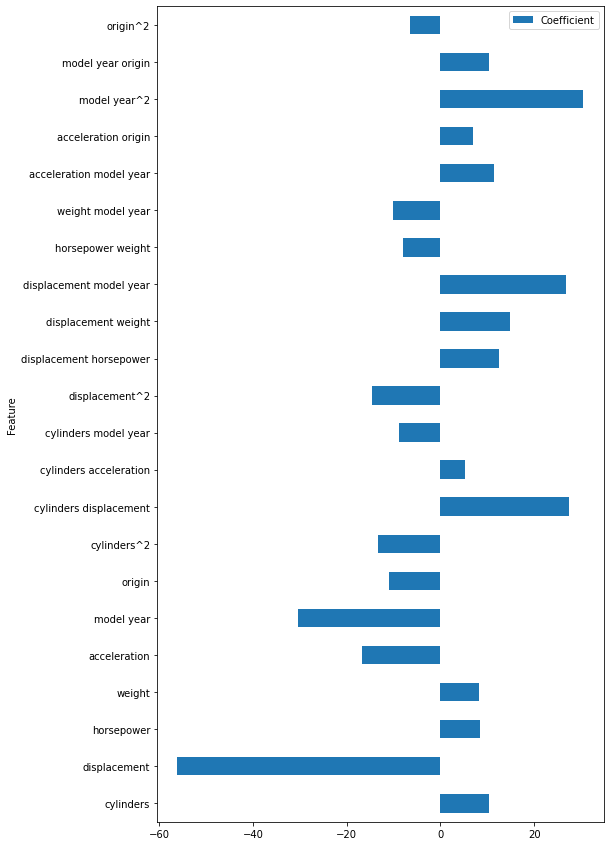

In [ ]:
poly_reg_coefs[poly_reg_coefs['Coefficient'].abs() > 5].plot.barh(figsize=(8, 15))

### Error Display

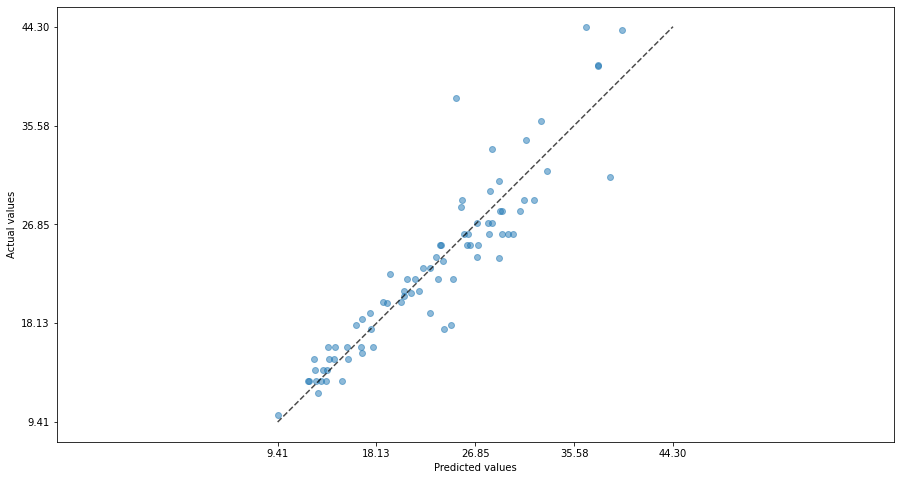

In [ ]:
_, ax = plt.subplots(figsize=(15, 8))
PredictionErrorDisplay.from_estimator(poly_reg_pipe, X_test, y_test, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5})

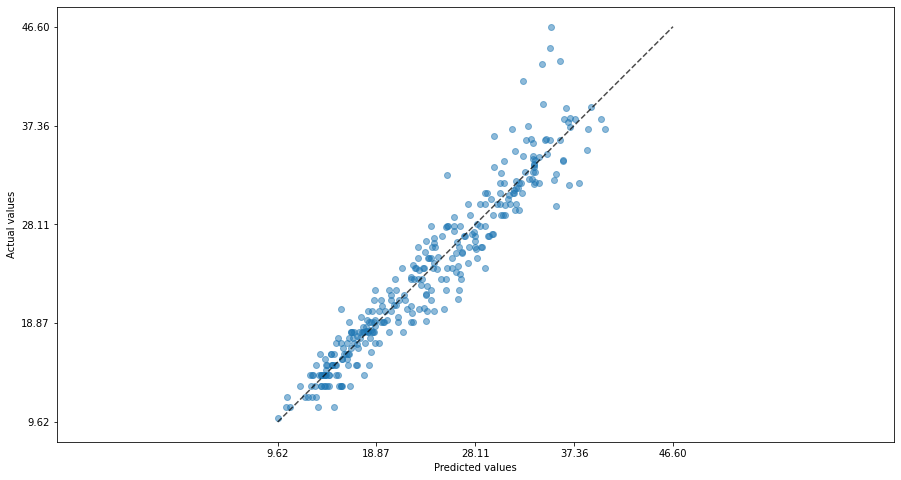

In [ ]:
_, ax = plt.subplots(figsize=(15, 8))
PredictionErrorDisplay.from_estimator(poly_reg_pipe, X_train, y_train, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5})

Visually nice!

## Ridge

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

We regularize our polynomial regression using l2 regularization(Ridge regression)

In [ ]:
ridge_poly_reg_pipe = Pipeline([
    ('Encoder', preprocessor_encode),
    ('Imputer', KNNImputer()),
    ('Polynomial', preprocessor_poly_after_encode),
    ('Scale', preprocessor_scale_after_poly),
    ('Regressor', Ridge(random_state=rs))
])

In [ ]:
ridge_poly_reg_pipe.fit(X_train, y_train)
ridge_poly_reg_pipe.score(X_test, y_test), ridge_poly_reg_pipe.score(X_train, y_train)

(0.8496030869340893, 0.9014478347878517)

The default hyper-parameters gives scores around the same from using vanila polynomial regression

### Grid Search

So we use `GridSearchCV` to find better hyper-parameters for degree of our polynomial features and also for alpha for regularization.

In [ ]:
alphas = np.logspace(-10, 10, 13)
param_grid = {
    'Polynomial__polynomialfeatures__degree': [5, 6, 7, 8],
    'Regressor__alpha': alphas,
}
ridge_poly_search = GridSearchCV(estimator=ridge_poly_reg_pipe,
                                 param_grid=param_grid,
                                 verbose=1,
                                 n_jobs=-1,
                                 cv=5)
ridge_poly_search.fit(X_train, y_train)
ridge_poly_search.score(X_test, y_test), ridge_poly_search.score(X_train, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


(0.8524559471422084, 0.9221944729097054)

Around the same from vanila polynomial regression using degree 2. But probably better generally!

Our best parameters and best score we could get are as follows:

In [ ]:
ridge_poly_search.best_params_

{'Polynomial__polynomialfeatures__degree': 8,
 'Regressor__alpha': 46.415888336127914}

In [ ]:
ridge_poly_search.best_score_

0.8863485040292959

### Features Coefficient

We only gonna look at the features that are most important:

In [ ]:
ridge_poly_reg_coefs = pd.DataFrame(zip(ridge_poly_search.best_estimator_[:-1].get_feature_names_out(), ridge_poly_search.best_estimator_[-1].coef_), columns=['Feature', 'Coefficient']).set_index('Feature')
print(ridge_poly_reg_coefs[ridge_poly_reg_coefs['Coefficient'].abs() > 0.1])

                                              Coefficient
Feature                                                  
weight                                          -0.122287
model year                                       0.122081
displacement acceleration                       -0.101552
weight acceleration                             -0.143207
weight model year                               -0.121342
model year^2                                     0.147508
displacement acceleration^2                     -0.128064
displacement acceleration model year            -0.104001
weight acceleration^2                           -0.118842
weight acceleration model year                  -0.123991
weight model year^2                             -0.108199
model year^3                                     0.171171
displacement acceleration^3                     -0.126724
displacement acceleration^2 model year          -0.118163
displacement acceleration model year^2          -0.100948
model year^4  

<Axes: ylabel='Feature'>

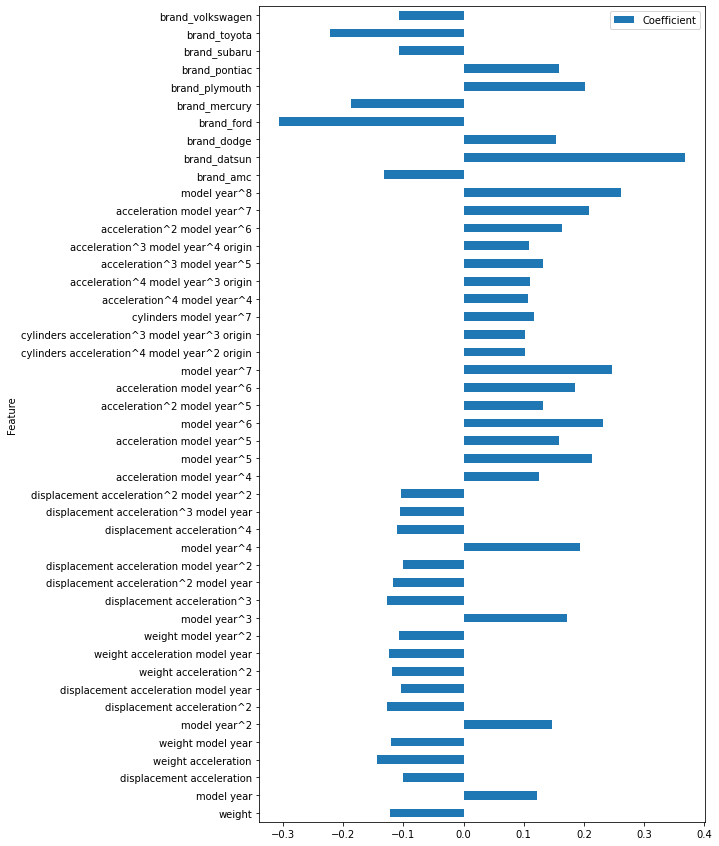

In [ ]:
ridge_poly_reg_coefs[ridge_poly_reg_coefs['Coefficient'].abs() > 0.1].plot.barh(figsize=(8, 15))

Not really intuitive. But we can infer some.

The model year is mostly the important feature. As we saw with linear regression too. Also the weight of the car has an inverse impact.

ford cars are most likely to have less mpg, On the other hand datsun cars probably have more mpg than others.

## Lasso

Lasso is good for interpretion. Because it minimize low effect features to 0 so they won't have any effect.

In [ ]:
lasso_poly_reg_pipe = Pipeline([
    ('Encoder', preprocessor_encode),
    ('Imputer', KNNImputer()),
    ('Polynomial', preprocessor_poly_after_encode),
    ('Scale', preprocessor_scale_after_poly),
    ('Regressor', Lasso(random_state=rs, max_iter=10_000))
])

In [ ]:
lasso_poly_reg_pipe.fit(X_train, y_train)
lasso_poly_reg_pipe.score(X_test, y_test), lasso_poly_reg_pipe.score(X_train, y_train)

(0.7673257897771444, 0.8179521387157387)

The default hyper-parameters don't build a good model

In [ ]:
alphas

array([1.00000000e-10, 4.64158883e-09, 2.15443469e-07, 1.00000000e-05,
       4.64158883e-04, 2.15443469e-02, 1.00000000e+00, 4.64158883e+01,
       2.15443469e+03, 1.00000000e+05, 4.64158883e+06, 2.15443469e+08,
       1.00000000e+10])

### Grid Search
Let's use a grid search over polynomial degress and alphas:

In [ ]:
param_grid = {
    'Polynomial__polynomialfeatures__degree': [2, 3, 4, 5, 7, 8],
    'Regressor__alpha': alphas,
}
lasso_poly_search = GridSearchCV(estimator=lasso_poly_reg_pipe,
                                 param_grid=param_grid,
                                 verbose=1,
                                 n_jobs=-1,
                                 cv=5)
lasso_poly_search.fit(X_train, y_train)
lasso_poly_search.score(X_test, y_test), lasso_poly_search.score(X_train, y_train)

Fitting 5 folds for each of 78 candidates, totalling 390 fits


(0.8603254070664322, 0.9170636797760365)

Wow. the highest scores so far! Great!

In [ ]:
lasso_poly_search.best_params_

{'Polynomial__polynomialfeatures__degree': 8,
 'Regressor__alpha': 0.021544346900318867}

In [ ]:
lasso_poly_search.best_score_

0.8850968322328157

### Features Coefficient

In [ ]:
lasso_poly_reg_coefs = pd.DataFrame(zip(lasso_poly_search.best_estimator_[:-1].get_feature_names_out(), lasso_poly_search.best_estimator_[-1].coef_), columns=['Feature', 'Coefficient']).set_index('Feature')
print(lasso_poly_reg_coefs[lasso_poly_reg_coefs['Coefficient'] != 0])

                                                    Coefficient
Feature                                                        
weight                                                -0.094596
displacement model year                               -1.898682
weight model year                                     -1.996583
displacement acceleration^2                           -1.595733
horsepower weight origin                              -0.973382
displacement acceleration^3                           -1.891038
horsepower weight model year origin                   -0.159498
horsepower acceleration model year^2                  -0.817198
horsepower acceleration model year^3                  -0.371471
horsepower^2 acceleration model year^2 origin         -0.201483
cylinders^5 origin^2                                  -0.056819
horsepower^2 weight acceleration^2 origin^2           -0.320429
horsepower^2 acceleration model year^3 origin         -0.058874
horsepower acceleration^6               

<Axes: ylabel='Feature'>

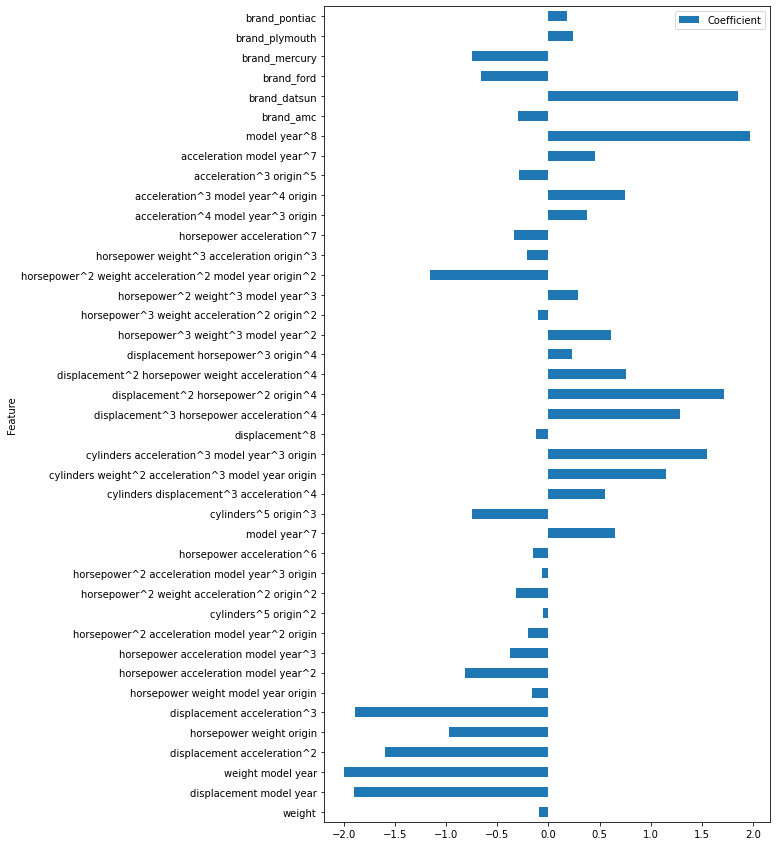

In [ ]:
lasso_poly_reg_coefs[lasso_poly_reg_coefs['Coefficient'] != 0].plot.barh(figsize=(8, 15))

Now let's interpret the coefficients that lasso kept:

The most important ones are again model year and weight(But not alone).
As model year goes higher mpg goes higher too. But if model year and weight multiplied goes higher mpg goes lesser.

datsun brand is the best one again!


## Elastic Net

A mix of ridge and lasso!

In [ ]:
elastic_poly_reg_pipe = Pipeline([
    ('Encoder', preprocessor_encode),
    ('Imputer', KNNImputer()),
    ('Polynomial', preprocessor_poly_after_encode),
    ('Scale', preprocessor_scale_after_poly),
    ('Regressor', ElasticNet(random_state=rs, max_iter=10_000))
])

In [ ]:
elastic_poly_reg_pipe.fit(X_train, y_train)
elastic_poly_reg_pipe.score(X_test, y_test), elastic_poly_reg_pipe.score(X_train, y_train)

(0.7525351532659985, 0.8147178316256142)

Not good with default hyper-parameters!

### Grid Search

In [ ]:
l1_ratio = np.linspace(0.1, 0.9, 5)
l1_ratio

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [ ]:
alphas = np.logspace(-3, 3, 5)
alphas

array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03])

In [ ]:
param_grid = {
    'Polynomial__polynomialfeatures__degree': [4, 5, 7, 8],
    'Regressor__alpha': alphas,
    'Regressor__l1_ratio': l1_ratio,
}
elastic_poly_search = GridSearchCV(estimator=elastic_poly_reg_pipe,
                                 param_grid=param_grid,
                                 verbose=1,
                                 n_jobs=-1,
                                 cv=5)
elastic_poly_search.fit(X_train, y_train)
elastic_poly_search.score(X_test, y_test), elastic_poly_search.score(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.410e+00, tolerance: 1.908e+00
  model = cd_fast.enet_coordinate_descent(


(0.8579000829922264, 0.9213004164007228)

In [ ]:
elastic_poly_search.best_params_

{'Polynomial__polynomialfeatures__degree': 8,
 'Regressor__alpha': 0.03162277660168379,
 'Regressor__l1_ratio': 0.30000000000000004}

In [ ]:
elastic_poly_search.best_score_

0.8881701504098245

In [ ]:
elastic_poly_reg_coefs = pd.DataFrame(zip(elastic_poly_search.best_estimator_[:-1].get_feature_names_out(), elastic_poly_search.best_estimator_[-1].coef_), columns=['Feature', 'Coefficient']).set_index('Feature')
print(elastic_poly_reg_coefs[elastic_poly_reg_coefs['Coefficient'].abs() > 0.25])

                                              Coefficient
Feature                                                  
displacement                                    -0.278320
weight                                          -0.416229
displacement acceleration                       -0.339790
displacement model year                         -0.273274
weight acceleration                             -0.362676
weight model year                               -0.415080
displacement acceleration^2                     -0.423356
displacement acceleration model year            -0.327060
weight acceleration model year                  -0.289207
weight model year^2                             -0.356431
displacement acceleration^3                     -0.411086
displacement acceleration^2 model year          -0.362427
displacement acceleration model year^2          -0.292224
model year^4                                     0.267169
displacement acceleration^4                     -0.339038
displacement a

<Axes: ylabel='Feature'>

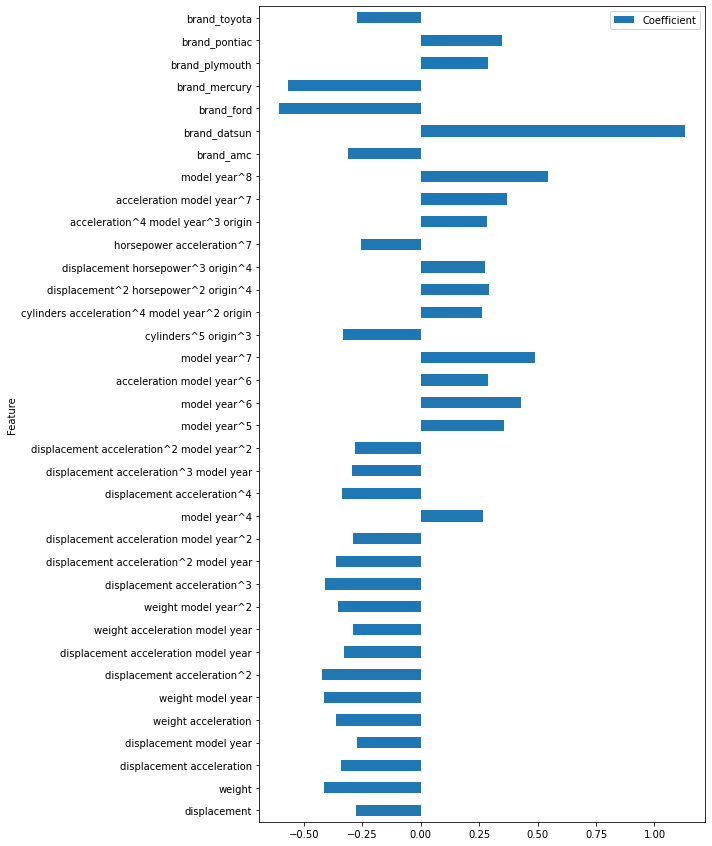

In [ ]:
elastic_poly_reg_coefs[elastic_poly_reg_coefs['Coefficient'].abs() > 0.25].plot.barh(figsize=(8, 15))

Mostly the same results from the last model

# SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor

In [ ]:
svr_pipe = Pipeline([
    ('Preprocessor', preprocessor),
    ('Imputer', KNNImputer()),
    ('Regressor', TransformedTargetRegressor(regressor=SVR(), transformer=StandardScaler()))
])

In [ ]:
svr_pipe.fit(X_train, y_train)
svr_pipe.score(X_test, y_test), svr_pipe.score(X_train, y_train)

(0.8636506753078328, 0.9293082716010128)

In [ ]:
param_grid = {
    'Regressor__regressor__C': [1, 8, 10, 30],
    'Regressor__regressor__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
}

In [ ]:
svr_search = GridSearchCV(estimator=svr_pipe,
                          param_grid=param_grid,
                          n_jobs=-1,
                          verbose=1,
                          cv=5)
svr_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['brand']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         array(['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'], dtype=object))],
                                                          verbose_feature_names_out=False)),
                                       ('Imputer', KNNImputer()),
                                       ('Regressor',
                                        TransformedTargetRegressor(regressor=SVR(),
                                                                   transformer=StandardScaler()))]),
             n_jobs=-1,
             param_grid={'Regressor__regressor__C': [1, 8, 10, 30],
                         'Regressor__regressor__kernel': ['rbf', 'poly',
                                                          'sigmoid',
                                                          'linear']},
             verbose=1)

In [ ]:
svr_search.best_params_

{'Regressor__regressor__C': 10, 'Regressor__regressor__kernel': 'rbf'}

In [ ]:
svr_search.score(X_test, y_test), svr_search.score(X_train, y_train)

(0.8833993585211664, 0.9624532605076092)

## Feature importances

We can use `permutation_importance` to find out the most importante features of our SVR model:

In [ ]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

### Using test set

In [ ]:
feature_importances = permutation_importance(svr_search.best_estimator_,
                           X_test, y_test,
                           n_repeats=10,
                           random_state=rs,
                           n_jobs=-1)

In [ ]:
sorted_indices = feature_importances.importances_mean.argsort()

In [ ]:
feature_importances.importances_mean[sorted_indices]

array([0.04686677, 0.05235128, 0.07238887, 0.11710409, 0.21289096,
       0.25627138, 0.25759143, 0.41943006])

we then plot the most important features by bar ploting their means and using box plots to find out their changes

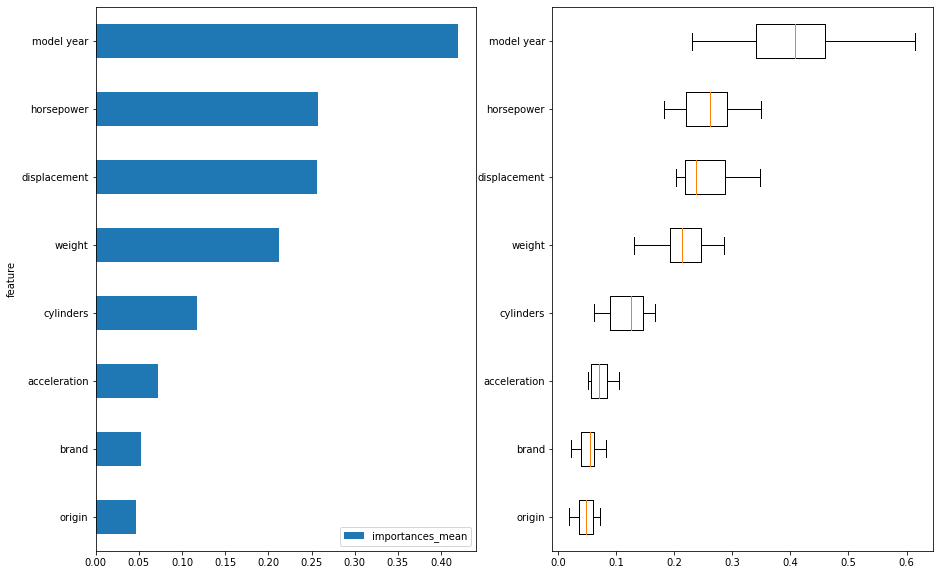

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
pd.DataFrame(zip(X_test.columns.values[sorted_indices], feature_importances.importances_mean[sorted_indices]),
             columns=['feature', 'importances_mean']).set_index('feature').plot.barh(ax=ax1)
ax2.boxplot(feature_importances.importances[sorted_indices].T, vert=False, labels=X_test.columns.values[sorted_indices]);

And we come to the conclusion that model year is the most important feature to have an affect on mpg of our car!

### Using training set

In [ ]:
feature_importances = permutation_importance(svr_search.best_estimator_,
                           X_train, y_train,
                           n_repeats=10,
                           random_state=rs,
                           n_jobs=-1)

In [ ]:
sorted_indices = feature_importances.importances_mean.argsort()

In [ ]:
feature_importances.importances_mean[sorted_indices]

array([0.05910839, 0.06031027, 0.08917606, 0.14971675, 0.26870904,
       0.27120545, 0.27385362, 0.3038095 ])

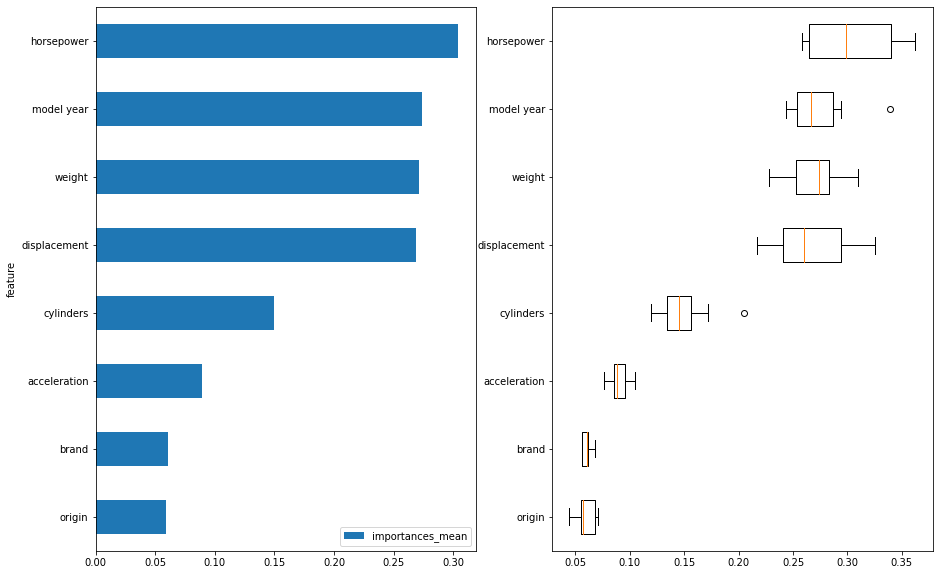

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
pd.DataFrame(zip(X_train.columns.values[sorted_indices], feature_importances.importances_mean[sorted_indices]),
             columns=['feature', 'importances_mean']).set_index('feature').plot.barh(ax=ax1)
ax2.boxplot(feature_importances.importances[sorted_indices].T, vert=False, labels=X_train.columns.values[sorted_indices]);

It's almost the same

## PDP

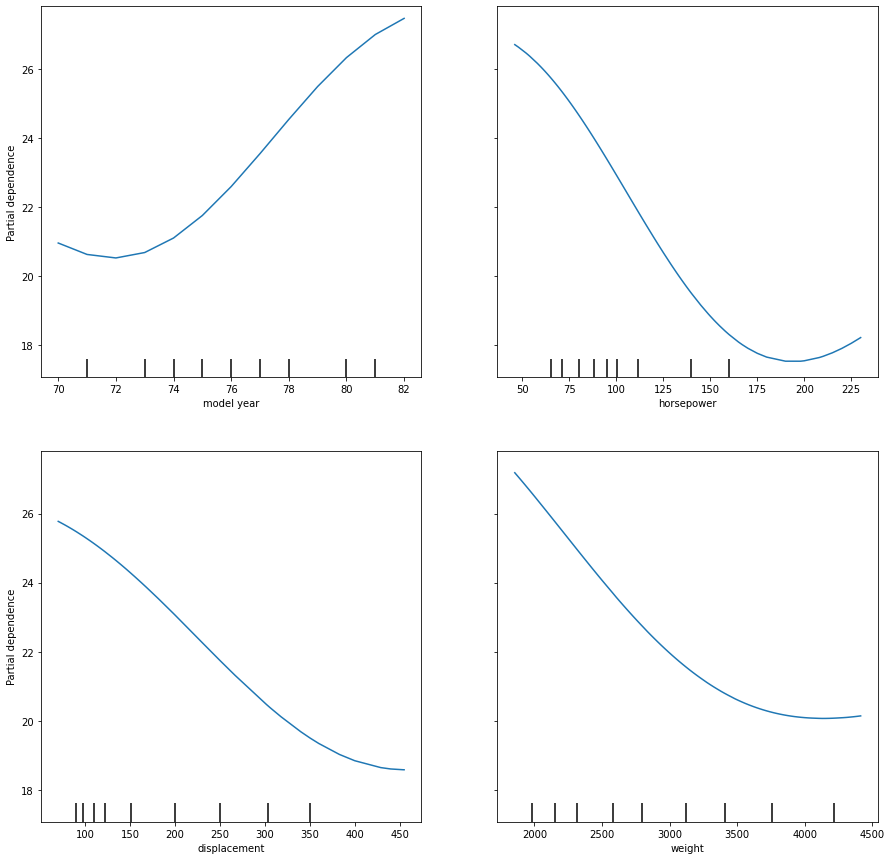

In [ ]:
important_features = ['model year', 'horsepower', 'displacement', 'weight']
_, axes = plt.subplots(2, 2, figsize=(15, 15))
PartialDependenceDisplay.from_estimator(
    estimator=svr_search.best_estimator_,
    X=X_train,
    features=important_features,
    random_state=rs,
    n_jobs=-1,
    ax=axes
)

mpg gets higher when model year increases, and gets lower when horsepower and displacement and weight increases.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_pipe = Pipeline([
    ('Encode', preprocessor_encode),
    ('Imputer', KNNImputer()),
    ('Regressor', DecisionTreeRegressor(random_state=rs, max_depth=10, min_samples_leaf=5))
])

In [ ]:
dt_pipe.fit(X_train, y_train)
dt_pipe.score(X_test, y_test), dt_pipe.score(X_train, y_train)

(0.7762078514175347, 0.9432455589132641)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_pipe = Pipeline([
    ('Encode', preprocessor_encode),
    ('Imputer', KNNImputer()),
    ('Regressor', RandomForestRegressor(n_jobs=-1, random_state=rs))
])

In [ ]:
rf_pipe.fit(X_train, y_train)
rf_pipe.score(X_test, y_test), rf_pipe.score(X_train, y_train)

(0.8573153739178117, 0.9830143580560291)

In [ ]:
param_grid = {
    'Regressor__n_estimators': [100, 200, 250, 300],
    'Regressor__max_depth': [5, 10, 25, 50],
    'Regressor__min_samples_leaf': [1, 5, 10, 50]
}

In [ ]:
rf_search = GridSearchCV(estimator=rf_pipe,
                         param_grid=param_grid,
                         n_jobs=-1,
                         verbose=1,
                         cv=5)
rf_search.fit(X_train, y_train)
rf_search.score(X_test, y_test), rf_search.score(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


(0.8249095010152814, 0.9374429403023687)

In [ ]:
rf_search.best_params_

{'Regressor__max_depth': 10,
 'Regressor__min_samples_leaf': 5,
 'Regressor__n_estimators': 250}

# XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_pipe = Pipeline([
    ('Encode', preprocessor_encode),
    ('Imputer', KNNImputer()),
    ('Regressor', XGBRegressor())
])

In [ ]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('Encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['brand'])],
                                   verbose_feature_names_out=False)),
                ('Imputer', KNNImputer()),
                ('Regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_st...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [ ]:
xgb_pipe.score(X_test, y_test), xgb_pipe.score(X_train, y_train)

(0.8498854979217343, 0.9999282492092502)

In [ ]:
param_grid = {
    'Regressor__n_estimators': [20, 50, 100],
    'Regressor__eta': [0.3, 0.1, 0.5, 1, 10],
}
xgb_search = GridSearchCV(estimator=xgb_pipe,
                          param_grid=param_grid,
                          n_jobs=-1,
                          verbose=1,
                          cv=5)
xgb_search.fit(X_train, y_train)
xgb_search.score(X_test, y_test), xgb_search.score(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [ 8.28276865e-01  8.26266830e-01  8.25006318e-01  6.87897131e-01
  8.47546113e-01  8.43359980e-01  8.23843481e-01  8.22419555e-01
  8.22034734e-01  7.72302471e-01  7.72196103e-01  7.72198222e-01
 -7.29854647e+38             nan             nan]
  warnings.warn(


(0.8302205195717367, 0.9875924935208755)

In [ ]:
xgb_search.best_params_

{'Regressor__eta': 0.1, 'Regressor__n_estimators': 50}

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_pipe = Pipeline([
    ('Preprocessor', preprocessor),
    ('Imputer', KNNImputer()),
    ('Regressor', KNeighborsRegressor(n_neighbors=5))
])

In [ ]:
knn_pipe.fit(X_train, y_train)
knn_pipe.score(X_test, y_test), knn_pipe.score(X_train, y_train)

(0.792849144405399, 0.890397376999412)

# Next Steps

For our next steps, we can try hyper-parameter tune some of these models to see which is the best and then analyze it's feature importances!